<a href="https://colab.research.google.com/github/Ishaqinu/meachine-learning-projects/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv('/content/Iris.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.drop(['Id'],axis=1,inplace=True)
data.isna().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
score=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
score,report,matrix

(0.9111111111111111,
 '                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        17\nIris-versicolor       0.77      0.91      0.83        11\n Iris-virginica       0.93      0.82      0.87        17\n\n       accuracy                           0.91        45\n      macro avg       0.90      0.91      0.90        45\n   weighted avg       0.92      0.91      0.91        45\n',
 array([[17,  0,  0],
        [ 0, 10,  1],
        [ 0,  3, 14]]))

[Text(0.5, 0.9166666666666666, 'petal width <= -0.548\nentropy = 1.58\nsamples = 105\nvalue = [33, 39, 33]\nclass = Iris-versicolor'),
 Text(0.3333333333333333, 0.75, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = Iris-setosa'),
 Text(0.6666666666666666, 0.75, 'petal width <= 0.718\nentropy = 0.995\nsamples = 72\nvalue = [0, 39, 33]\nclass = Iris-versicolor'),
 Text(0.5, 0.5833333333333334, 'sepal width <= -1.059\nentropy = 0.281\nsamples = 41\nvalue = [0, 39, 2]\nclass = Iris-versicolor'),
 Text(0.3333333333333333, 0.4166666666666667, 'petal length <= 0.438\nentropy = 0.592\nsamples = 14\nvalue = [0, 12, 2]\nclass = Iris-versicolor'),
 Text(0.16666666666666666, 0.25, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10, 0]\nclass = Iris-versicolor'),
 Text(0.5, 0.25, 'sepal length <= 0.408\nentropy = 1.0\nsamples = 4\nvalue = [0, 2, 2]\nclass = Iris-versicolor'),
 Text(0.3333333333333333, 0.08333333333333333, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = Iris-virginica'),

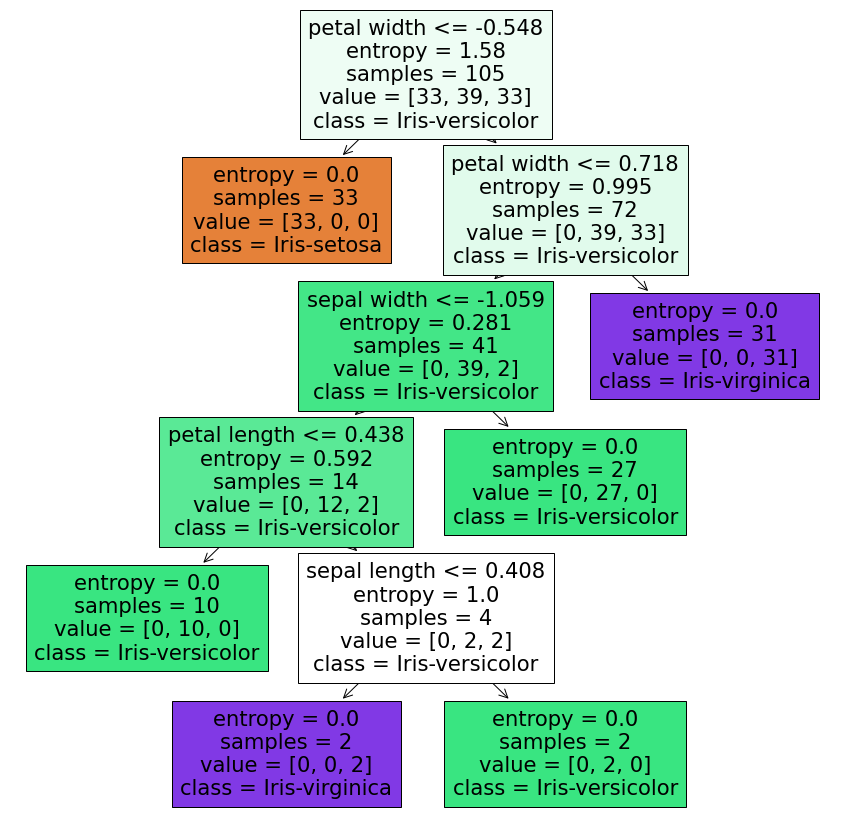

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(model,feature_names=['sepal length','sepal width','petal length','petal width'],class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],filled=True)